## EE 242 Lab 1 – Modifying Signals

Dylan D. and Diego C.

(This should be a markup cell, which means that when you run it you just get formated text.)

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included
import simpleaudio as sa
#from scipy.io import wavefile as wav
from scipy import signal as sig
from scipy.io import wavfile as wav

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 1 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Working with sound files

In [22]:
# Assignment 1 - Time Scaling Function

# Part A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t


In [23]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part A
# TODO: Code that solves A
fs1, x1 = wav.read('train32.wav')
print(fs1)
print(x1.shape)

# Part B
# TODO: Code that solves B
fs2 = int(fs1/2) # creating new fs
fs3 = int(1.5*fs1) # creating new fs
outfile2 = 'train_data2.wav'
outfile3 = 'train_data3.wav'
wav.write(outfile2,fs2, x1)
wav.write(outfile3,fs3, x1)

# Part C
# TODO: Code that solves C
wav_obj1 = sa.WaveObject.from_wave_file('train32.wav')
wav_obj2 = sa.WaveObject.from_wave_file('train_data2.wav')
wav_obj3 = sa.WaveObject.from_wave_file('train_data3.wav')
play_obj = wav_obj1.play()
play_obj.wait_done()
play_obj = wav_obj2.play()
play_obj.wait_done()
play_obj = wav_obj3.play()



32000
(50313,)


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

When we use a lower sampling frequency the audio sounds slowed down. When we use a higher sampling frequency the audio sounds sped up.

## Assignment 2 -- Amplitude Operations on Signals

In [30]:
# Assignment 2 - Amplitude Operations on Signals
# Part A
# TODO: Code that solves A
s1_p1 = np.ones(int(.5*fs1))
#array of ones with .5 sec gap

s1_p2 = np.ones(len(x1)-len(s1_p1))*.2
#array of ones, len1 is the same length of x1 

s1 = np.concatenate((s1_p1, s1_p2))
#links s1_p1 and s1_p2 together and sets as new variable s1

v1 = np.multiply(s1,x1)
#multiplies s1 and x1 and sets it as a new variable v1

wav.write('v1.wav', fs1, v1.astype('int16'))
#Writing new audio file with correct sampling frequency

In [34]:
# Part B
# TODO: Code that solves B
r1 = np.arange(1,0-1/(len(x1)-1),-1/(len(x1)-1))
v2 = np.multiply(x1,r1)
#mulitplying x1 and r1 to get v2
wav.write('v2.wav',fs1,v2.astype('int16'))
#Writing new audio file with correct sampling frequency

# Part C
# TODO: Code that solves C
wav_v1 = sa.WaveObject.from_wave_file('v1.wav')
play_v1 = wav_v1.play()
play_v1.wait_done()
#Validate the new audio file by playing it

wav_v2 = sa.WaveObject.from_wave_file('v2.wav')
play_v2 = wav_v2.play()
play_v2.wait_done()
#Validate the new audio file by playing it


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use?  

If we had defined s1 to be  2 then we would have gotten a higher ampl. in the range. If we wanted a smoother, faster decay in amplitud we would used a decaying exponential.

# Assignment 3 -- Time Scaling Audio Signals 

<IPython.core.display.Javascript object>


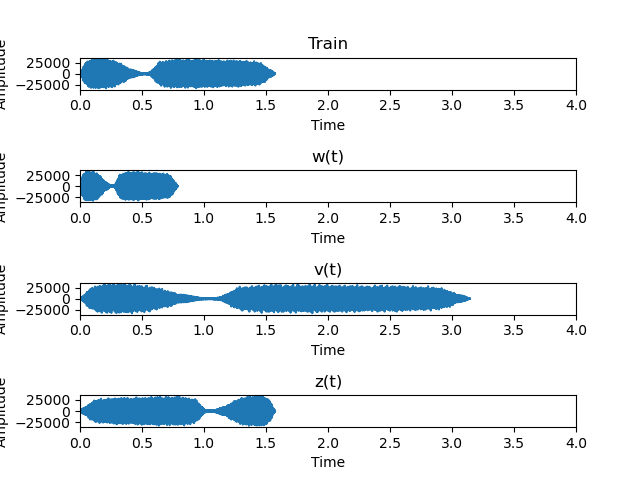

In [38]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
# Done above

# Part B
# TODO: Code that solves B
# using timescale function
w, t_w = timescale(x1, fs1, 2)
v, t_v = timescale(x1, fs1, 0.5)
x, t_x1 = timescale(x1, fs1, 1)
t_z = t_x1 # get t_z
z = x1[::-1] # reverse the signal
outfileZ = 'train_data_reverse.wav'
wav.write(outfileZ, fs1, z)

# Part C
# TODO: Code that solves C
# plotting signals
plt.figure()
plt.subplots_adjust(hspace=2.5)
plt.subplot(4,1,1)
plt.xlim(0,4)
plt.title('Train')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_x1, x1)
plt.subplot(4,1,2)
plt.xlim(0,4)
plt.title('w(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_w, w)
plt.subplot(4,1,3)
plt.xlim(0,4)
plt.title('v(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_v, v)
plt.subplot(4,1,4)
plt.xlim(0,4)
plt.title('z(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_z, z)

# Part D
# TODO: Code that solves D
# seeing if signals play as intended
outfile31 = 'train_double.wav'
outfile32 = 'train_half.wav'
outfile33 = 'train_reverse.wav'
wav.write(outfile31, fs1, w.astype('int16'))
wav.write(outfile32, fs1, v.astype('int16'))
wav.write(outfile33, fs1, z.astype('int16'))
wav_obj31 = sa.WaveObject.from_wave_file('train_double.wav')
wav_obj32 = sa.WaveObject.from_wave_file('train_half.wav')
wav_obj33 = sa.WaveObject.from_wave_file('train_reverse.wav')
play_obj = wav_obj31.play()
play_obj.wait_done()
play_obj = wav_obj32.play()
play_obj.wait_done()
play_obj = wav_obj33.play()


###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

I would expect each plot to be it's own figure. As a result, there would be multiple windows displaying graphs.

## Assignment 4 -- Time Shift Operations

In [4]:
def timeshift(x, fs, t0): # signal x, sampling frequency fs, time shift t0
    ns = x
    duration = len(x)/fs # duration of signal
    n0 = int(fs * abs(t0)) # number of samples shifting by
    tv = np.arange(0, duration, 1/fs) # creating time vector
    if t0 > 0: # If t0 is positive we want to shift left
        ns = x[n0:] # deleting values from list if shifting left
        zerolist = np.array([0] * n0) # create zeroes to add
        ns = np.concatenate([ns, zerolist]) # add zeroes
    elif t0 < 0:
        zerolist = np.array([0] * n0)
        ns = np.concatenate([zerolist, ns])
        tv = np.arange(0, duration+abs(t0), 1/fs) # new time vector with extended duration
    return ns, tv # return new signal & time vector

<IPython.core.display.Javascript object>


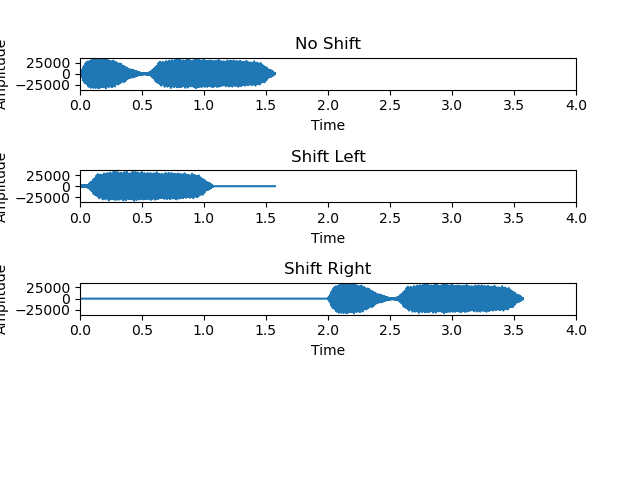

In [41]:
# Part A
# TODO: Code that solves A
# in own cell above

# Part B
# TODO: Code that solves B
# testing timeshift function
ns1, tv1 = timeshift(x1, fs1, 0)
ns2, tv2 = timeshift(x1, fs1, 0.5)
ns3, tv3 = timeshift(x1, fs1, -2)
# plotting signals
plt.figure()
plt.subplots_adjust(hspace=2.5)
plt.subplot(4,1,1)
plt.xlim(0,4)
plt.title('No Shift')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(tv1, ns1)
plt.subplot(4,1,2)
plt.xlim(0,4)
plt.title('Shift Left')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(tv2, ns2)
plt.subplot(4,1,3)
plt.xlim(0,4)
plt.title('Shift Right')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(tv3, ns3)

# Part C
# TODO: Code that solves C
# checking if audio plays as intended
outfile41 = 'train_no_shift.wav'
outfile42 = 'train_shift_left.wav'
outfile43 = 'train_shift_right.wav'
wav.write(outfile41, fs1, ns1.astype('int16'))
wav.write(outfile42, fs1, ns2.astype('int16'))
wav.write(outfile43, fs1, ns3.astype('int16'))
wav_obj41 = sa.WaveObject.from_wave_file('train_no_shift.wav')
wav_obj42 = sa.WaveObject.from_wave_file('train_shift_left.wav')
wav_obj43 = sa.WaveObject.from_wave_file('train_shift_right.wav')
play_obj = wav_obj41.play()
play_obj.wait_done()
play_obj = wav_obj42.play()
play_obj.wait_done()
play_obj = wav_obj43.play()


### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

The code currently handles the case where shift is equal to zero fine. However, if the shift is greater than the original signal, the code throws an error. There is a better implementation of the code and it would require another if statement to handle shifts larger than the duration of the signal. This would be a minor fix. We would first check if the shift is longer than the signal and if it is, then the new signal vector would have all it's data replaced with zeroes.
